In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Load the dataset
df = pd.read_csv("Data Set 2023.csv")

# Understanding the data set

In [38]:
df.shape

(4424, 35)

In [39]:
df.head(5) 

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [40]:
# Check for nulls
print("Null values in the dataset:")
print(df.isnull().sum())

# Check for duplicates
duplicates = df[df.duplicated()]
print("\nNumber of duplicate rows:", len(duplicates))

Null values in the dataset:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                       

# Data Pre-processing

In [41]:
# Drop duplicates
df = df.drop_duplicates()

In [42]:
# Convert 'Target' column to numeric values
df['Target'] = df['Target'].replace({'Dropout': 0, 'Enrolled': 1, 'Graduate': 1})

In [43]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [44]:
X = df.drop('Target', axis=1)
y = df['Target']

In [45]:
X

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,1,3,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,5,1,1,1,22,27,10,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,8,2,15,1,1,1,23,27,6,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,12,1,3,0,1,1,22,28,10,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,15,1,1,19,1,1,10,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,12,1,1,1,22,27,10,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9,1,1,1,22,27,8,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


In [46]:
# Find correlation of 'Target' with other numeric columns
correlation_matrix = df.corr()
target_correlation = correlation_matrix['Target'].sort_values(ascending=False)

# Display correlation values
print("\nCorrelation of 'Target' with other numeric columns:")
print(target_correlation)


Correlation of 'Target' with other numeric columns:
Target                                            1.000000
Curricular units 2nd sem (grade)                  0.571792
Curricular units 2nd sem (approved)               0.569500
Curricular units 1st sem (grade)                  0.480669
Curricular units 1st sem (approved)               0.479112
Tuition fees up to date                           0.429149
Scholarship holder                                0.245354
Curricular units 2nd sem (evaluations)            0.154999
Curricular units 2nd sem (enrolled)               0.141515
Curricular units 1st sem (enrolled)               0.124635
Displaced                                         0.107232
Curricular units 1st sem (evaluations)            0.090125
Daytime/evening attendance                        0.080499
Father's occupation                               0.079753
Application order                                 0.070485
Mother's occupation                               0.069102
GDP

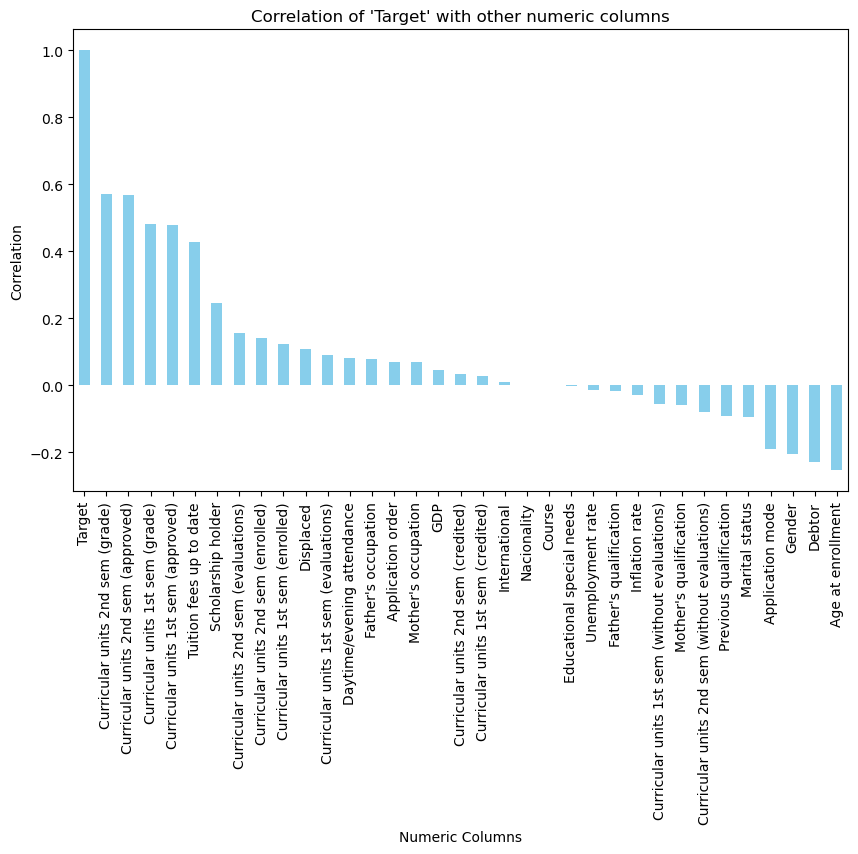

In [47]:
# Plotting the correlation values
plt.figure(figsize=(10, 6))
target_correlation.plot(kind='bar', color='skyblue')
plt.title("Correlation of 'Target' with other numeric columns")
plt.xlabel("Numeric Columns")
plt.ylabel("Correlation")
plt.show()

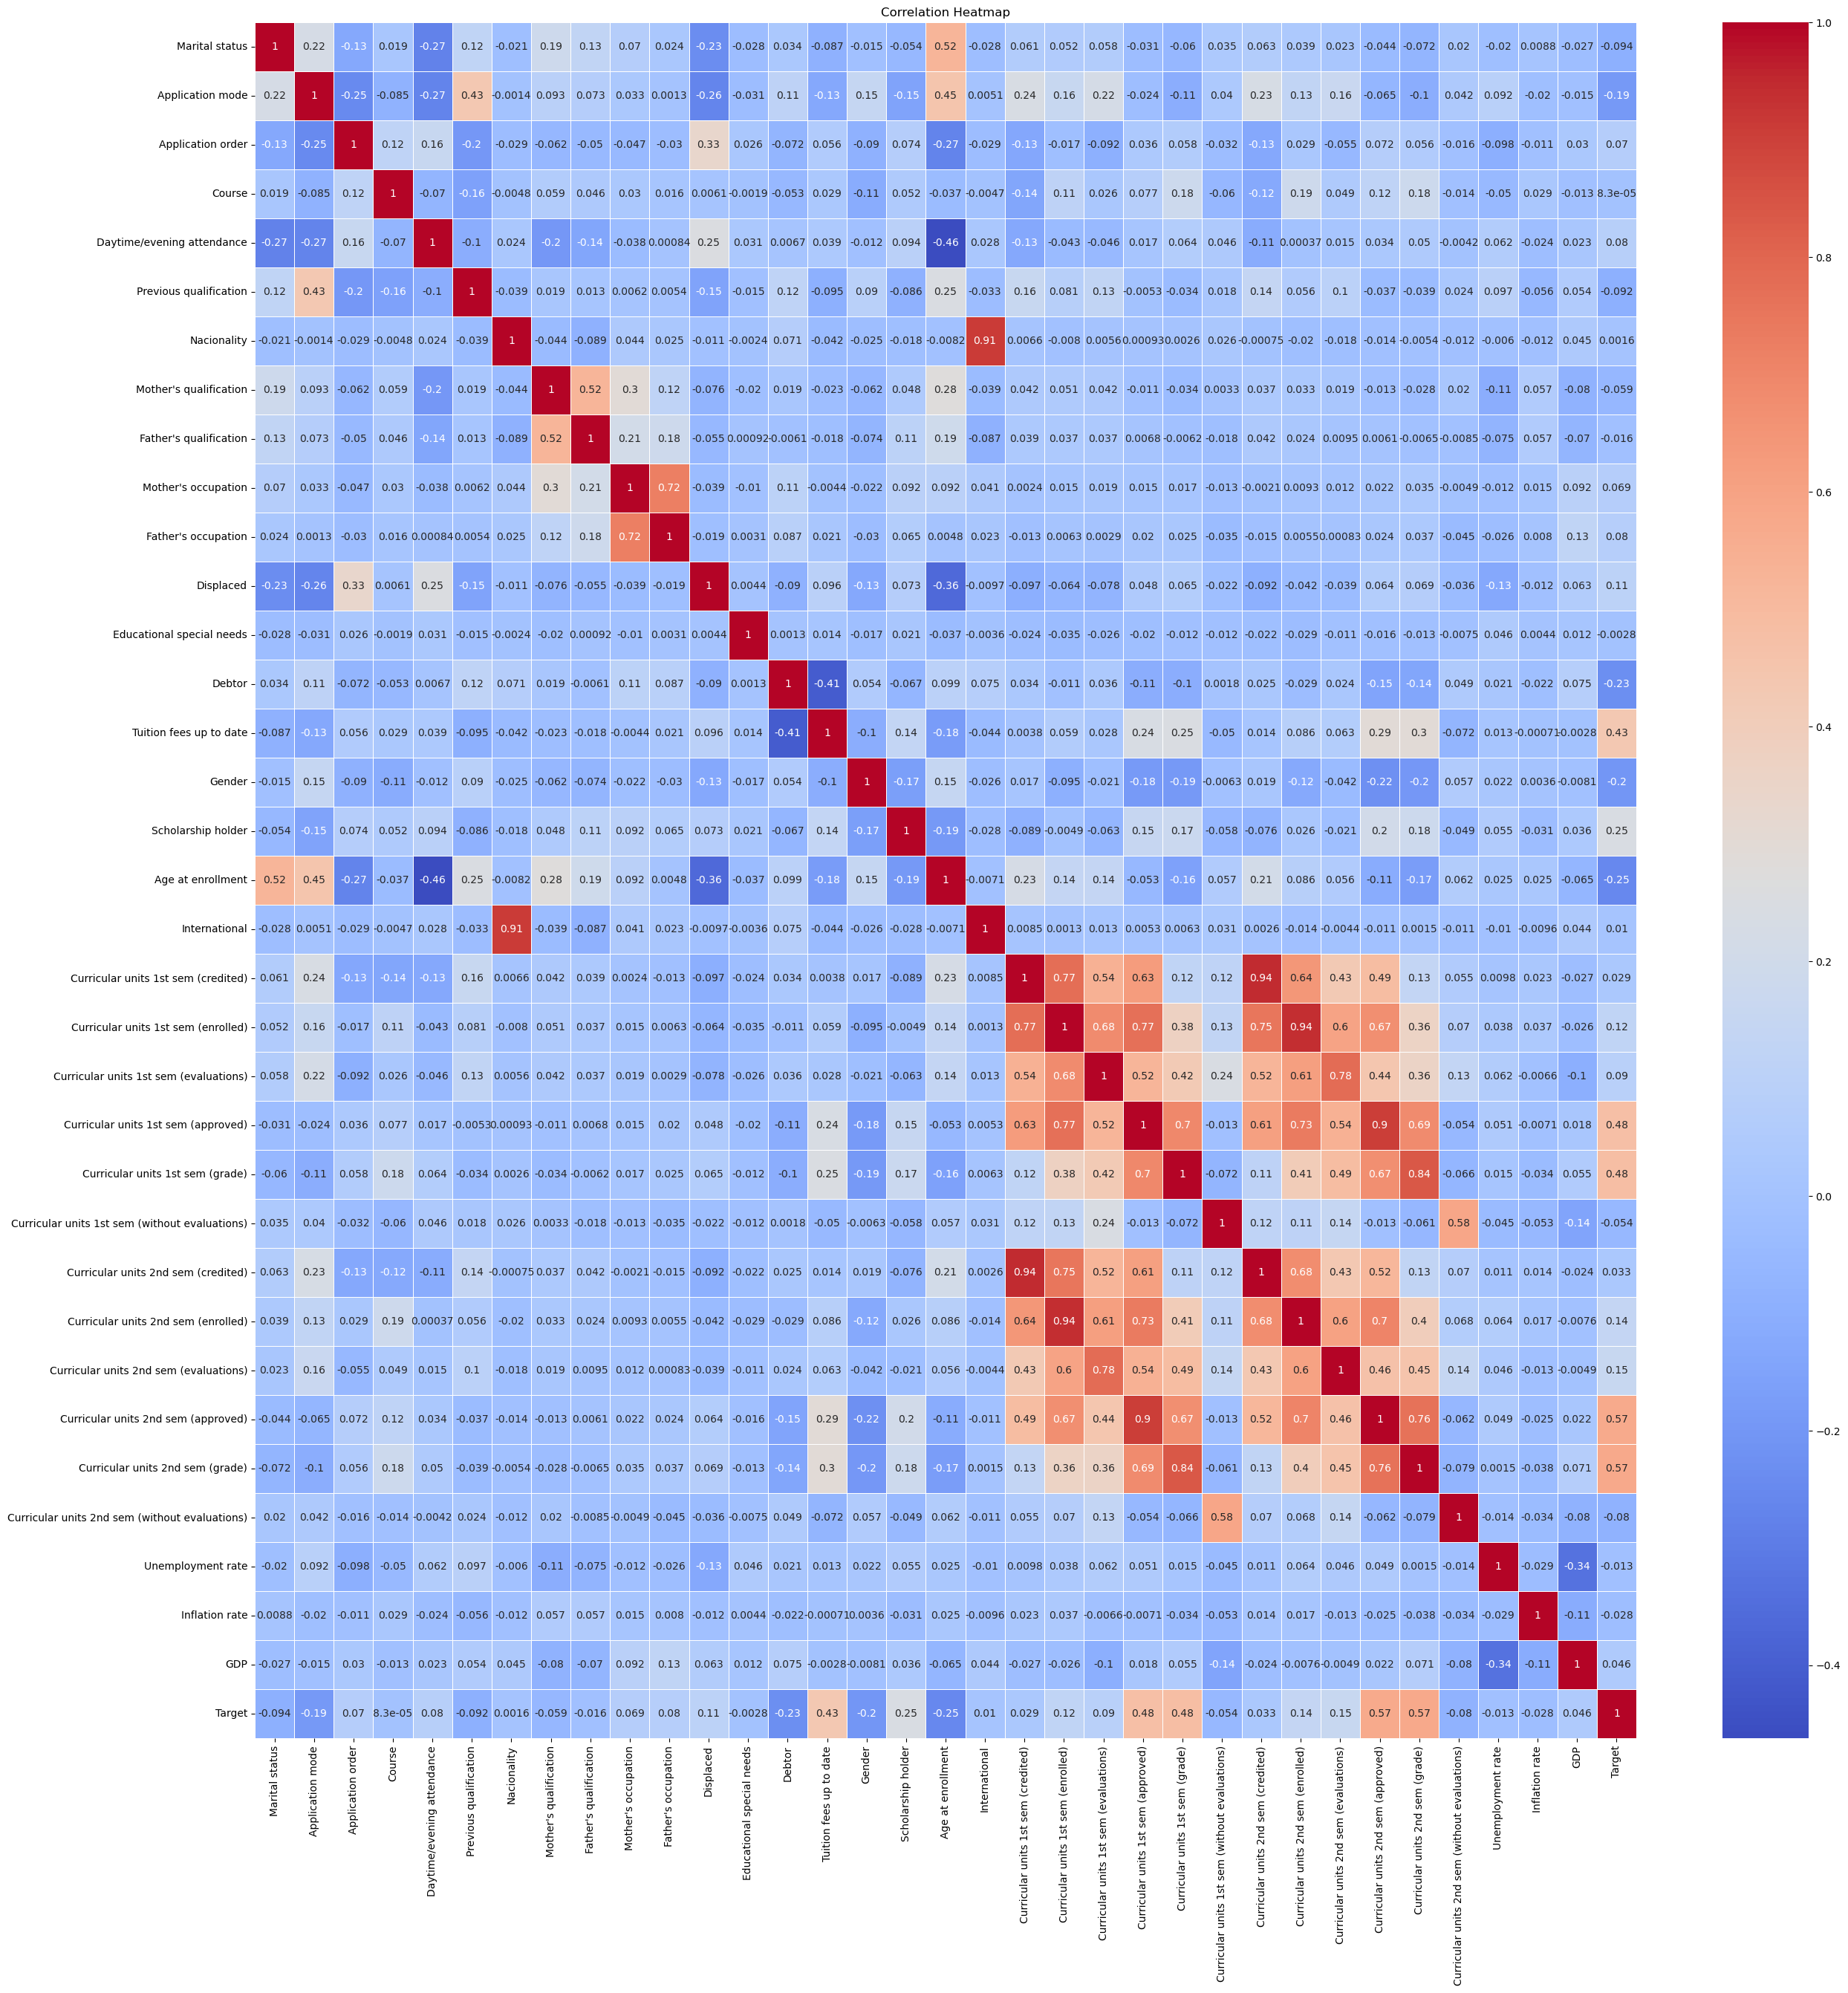

In [48]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr() , annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Heatmap')
plt.show()

In [49]:
# Set correlation threshold
correlation_threshold = 0.1

# Select columns with correlation above the threshold
selected_columns = target_correlation[abs(target_correlation) > correlation_threshold].index.tolist()

# Create a new DataFrame with only the selected columns
df_selected = df[selected_columns]

# Display the selected columns
print("\nSelected columns for prediction:")
print(df_selected.head())


Selected columns for prediction:
   Target  Curricular units 2nd sem (grade)  \
0       0                          0.000000   
1       1                         13.666667   
2       0                          0.000000   
3       1                         12.400000   
4       1                         13.000000   

   Curricular units 2nd sem (approved)  Curricular units 1st sem (grade)  \
0                                    0                          0.000000   
1                                    6                         14.000000   
2                                    0                          0.000000   
3                                    5                         13.428571   
4                                    6                         12.333333   

   Curricular units 1st sem (approved)  Tuition fees up to date  \
0                                    0                        1   
1                                    6                        0   
2                        

# Exploratory Data Analysis

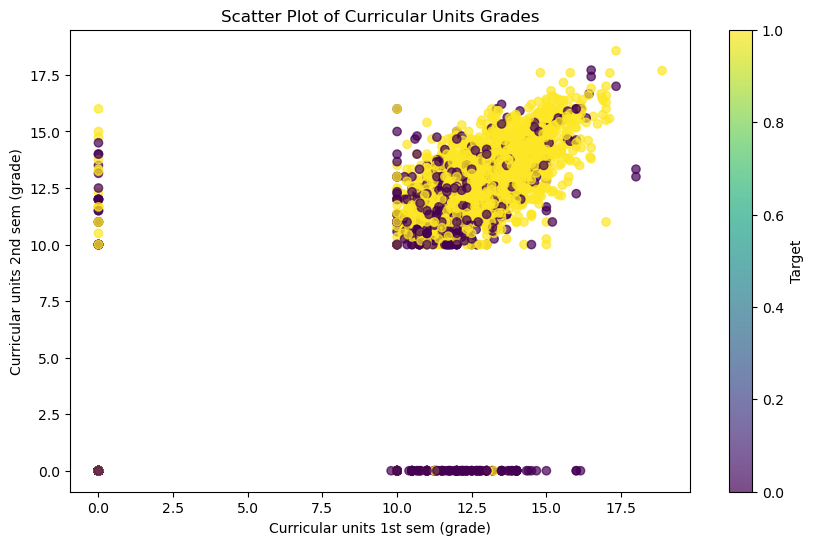

In [50]:
# Scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x = df['Curricular units 1st sem (grade)'],
    y = df['Curricular units 2nd sem (grade)'],
    c = df['Target'],
    cmap='viridis', 
    alpha=0.7
)

# Adding labels and title
plt.title('Scatter Plot of Curricular Units Grades')
plt.xlabel('Curricular units 1st sem (grade)')
plt.ylabel('Curricular units 2nd sem (grade)')

# Adding colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Target')

# Show the plot
plt.show()

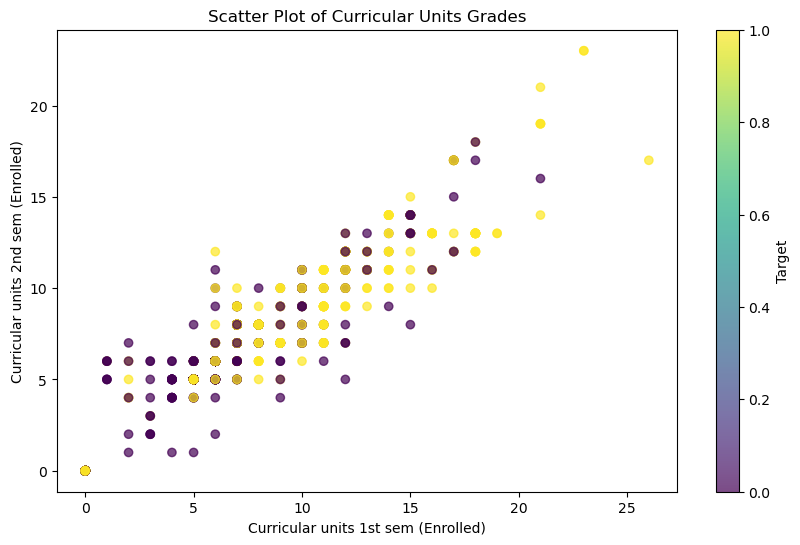

In [51]:
# Scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x = df['Curricular units 1st sem (enrolled)'],
    y = df['Curricular units 2nd sem (enrolled)'],
    c = df['Target'],
    cmap='viridis',
    alpha=0.7
)

# Adding labels and title
plt.title('Scatter Plot of Curricular Units Grades')
plt.xlabel('Curricular units 1st sem (Enrolled)')
plt.ylabel('Curricular units 2nd sem (Enrolled)')

# Adding colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Target')

# Show the plot
plt.show()

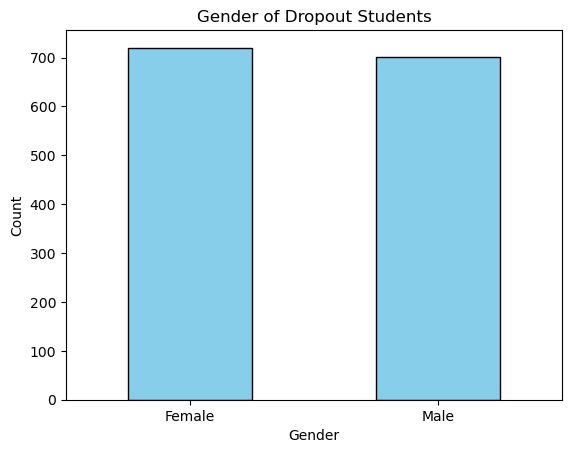

In [52]:
# Gender of Dropout Students 
filtered_data = df[df['Target'] == 0]

sorted_data = filtered_data.sort_values(by='Gender', ascending=False)
value_counts = sorted_data['Gender'].value_counts()

ax = value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender of Dropout Students')
ax.set_xticklabels(['Female', 'Male'], rotation=360)
plt.show()

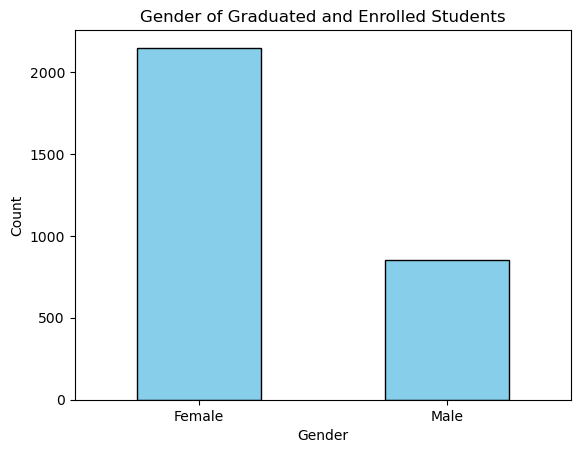

In [53]:
# Gender of Enrolled Students 
filtered_data = df[df['Target'] == 1]

sorted_data = filtered_data.sort_values(by='Gender', ascending=False)
value_counts = sorted_data['Gender'].value_counts()

ax = value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender of Graduated and Enrolled Students')
ax.set_xticklabels(['Female', 'Male'], rotation=360)
plt.show()

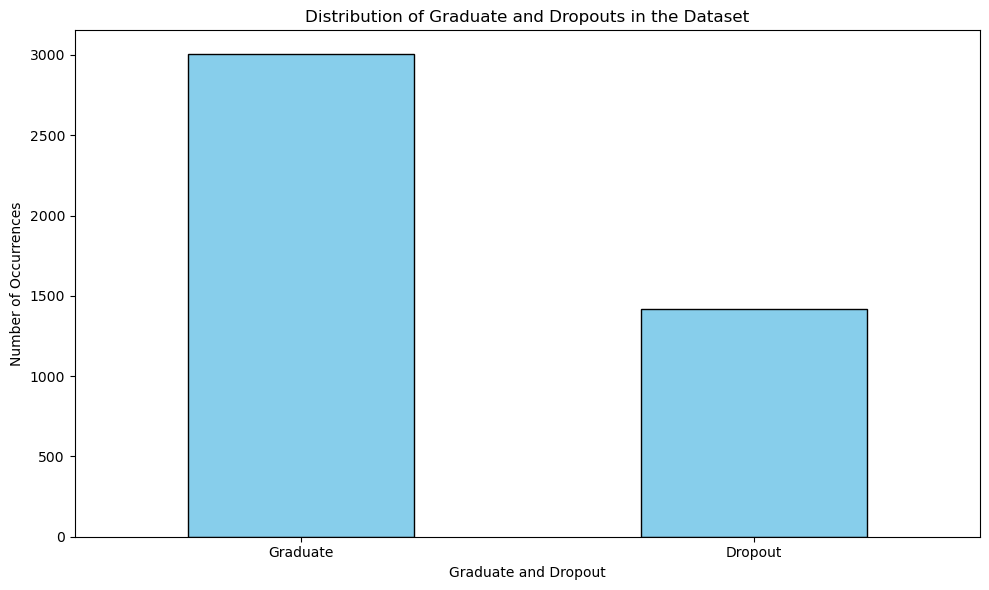

In [57]:
# Count the occurrences of each interests
climate_counts = df['Target'].value_counts()

plt.figure(figsize=(10, 6))
ax = climate_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Graduate and Dropouts in the Dataset')
plt.xlabel('Graduate and Dropout')
plt.ylabel('Number of Occurrences')
ax.set_xticklabels(['Graduate', 'Dropout'], rotation=360)
plt.tight_layout()

plt.show()

# Splitting the data into Training, Validating & Testing Data

In [60]:
# Split the data into training, validation, and testing sets
X = df_selected.drop('Target', axis=1)
y = df_selected['Target']

In [61]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [62]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [63]:
# Reshape X_train for LSTM input
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_lstm = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Training the model

In [64]:
# Recurrent Neural Network (LSTM)
model_rnn = Sequential()
model_rnn.add(LSTM(128, input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
model_rnn.add(Dropout(0.5))
model_rnn.add(LSTM(64))
model_rnn.add(Dropout(0.3))
model_rnn.add(Dense(1, activation='tanh'))

In [67]:
# Compile the model
model_rnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_rnn.fit(X_train_lstm, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/30
45/45 [==============================] - 8s 49ms/step - loss: 0.4215 - accuracy: 0.8473 - val_loss: 0.3749 - val_accuracy: 0.8616
Epoch 2/30
45/45 [==============================] - 1s 21ms/step - loss: 0.4366 - accuracy: 0.8375 - val_loss: 0.3975 - val_accuracy: 0.8503
Epoch 3/30
45/45 [==============================] - 1s 21ms/step - loss: 0.3802 - accuracy: 0.8551 - val_loss: 0.4359 - val_accuracy: 0.8559
Epoch 4/30
45/45 [==============================] - 1s 20ms/step - loss: 0.3784 - accuracy: 0.8530 - val_loss: 0.3980 - val_accuracy: 0.8475
Epoch 5/30
45/45 [==============================] - 1s 21ms/step - loss: 0.3835 - accuracy: 0.8509 - val_loss: 0.3641 - val_accuracy: 0.8588
Epoch 6/30
45/45 [==============================] - 1s 24ms/step - loss: 0.4184 - accuracy: 0.8551 - val_loss: 0.5354 - val_accuracy: 0.8362
Epoch 7/30
45/45 [==============================] - 1s 23ms/step - loss: 0.3863 - accuracy: 0.8601 - val_loss: 0.3723 - val_accuracy: 0.8531
Epoch 8/30
45

In [68]:
# Evaluate on the testing set
test_loss_rnn, test_accuracy_rnn = model_rnn.evaluate(X_test_lstm, y_test)
print(f'Testing Accuracy of Recurrent Neural Network: {test_accuracy_rnn * 100:.2f}%')

# Evaluate on the validation set
val_loss_rnn, val_accuracy_rnn = model_rnn.evaluate(X_val_lstm, y_val)
print(f'Validation Accuracy of Recurrent Neural Network: {val_accuracy_rnn * 100:.2f}%')

42/42 [==============================] - 0s 7ms/step - loss: 0.3746 - accuracy: 0.8419
Testing Accuracy of Recurrent Neural Network: 84.19%
42/42 [==============================] - 0s 7ms/step - loss: 0.3483 - accuracy: 0.8523
Validation Accuracy of Recurrent Neural Network: 85.23%


In [108]:
# Ask user for details
print("Enter Student Details")
print("----------------------------------------------------------")
# Ask user for input for each column
curricular_1st_sem_enrolled = input("Curricular units 1st sem (enrolled) : ")
curricular_1st_sem_approved = input("Curricular units 1st sem (approved) : ")
curricular_1st_sem_grade = input("Curricular units 1st sem (grade) : ")
curricular_2nd_sem_enrolled = input("Curricular units 2nd sem (enrolled) : ")
curricular_2nd_sem_approved = input("Curricular units 2nd sem (approved) : ")
curricular_2nd_sem_grade = input("Curricular units 2nd sem (grade) : ")
Curricular_units_2nd_sem_evaluations = input("Curricular units 2nd sem (evaluations) : ")
tuition_fees = input("Tuition fees up to date (Yes or No) : ")
scholarship_holder = input("Scholarship holder (Yes or No) : ")
displaced = input("Displaced (Yes or No) : ")
application_mode = input("Application mode (1 - 18) : ")
gender = input("Gender (Male or Female): ")
debtor = input("Debtor (Yes or No) : ")
enrollment_age = input("Age at enrollment : ")

Enter Student Details
----------------------------------------------------------
Curricular units 1st sem (enrolled) : 8
Curricular units 1st sem (approved) : 8
Curricular units 1st sem (grade) : 6
Curricular units 2nd sem (enrolled) : 8
Curricular units 2nd sem (approved) : 6
Curricular units 2nd sem (grade) : 6
Curricular units 2nd sem (evaluations) : 6
Tuition fees up to date (Yes or No) : Yes
Scholarship holder (Yes or No) : Yes
Displaced (Yes or No) : No
Application mode (1 - 18) : 6
Gender (Male or Female): Female
Debtor (Yes or No) : No
Age at enrollment : 26


In [109]:
# Define mapping for categorical variables
mapping = {'yes': 1, 'no': 0, 'male': 1, 'female': 0}

# Apply mapping to variables
tuition_fees = mapping.get(tuition_fees.lower(), 0)
scholarship_holder = mapping.get(scholarship_holder.lower(), 0)
displaced = mapping.get(displaced.lower(), 0)
gender = mapping.get(gender.lower(), 0)
debtor = mapping.get(debtor.lower(), 0)

In [110]:
# Create a DataFrame with user input
user_data = pd.DataFrame({
    'Curricular units 2nd sem (grade)': [curricular_2nd_sem_grade],
    'Curricular units 2nd sem (approved)': [curricular_2nd_sem_approved],
    'Curricular units 1st sem (grade)': [curricular_1st_sem_grade],
    'Curricular units 1st sem (approved)': [curricular_1st_sem_approved],
    'Tuition fees up to date': [tuition_fees],
    'Scholarship holder': [scholarship_holder],
    'Curricular units 2nd sem (evaluations)': [Curricular_units_2nd_sem_evaluations],
    'Curricular units 2nd sem (enrolled)': [curricular_2nd_sem_enrolled],
    'Curricular units 1st sem (enrolled)': [curricular_1st_sem_enrolled],
    'Displaced': [displaced],
    'Application mode': [application_mode],
    'Gender': [gender],
    'Debtor': [debtor],
    'Age at enrollment': [enrollment_age],
    
})

In [111]:
# Preprocess user data
user_data = scaler.transform(user_data)

In [112]:
# Reshape for LSTM input
user_data_lstm = user_data.reshape(user_data.shape[0], user_data.shape[1], 1)

In [113]:
# Predict using the trained model
prediction_rnn = model_rnn.predict(user_data_lstm)

1/1 [==============================] - 0s 33ms/step


In [119]:
print("\nPrediction:")
print(f"There is a {prediction_rnn[0, 0] * 100:.2f}% chance for this student to graduate!")


Prediction:
There is a 72.84% chance for this student to graduate!


# GUI Application

In [118]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox

# Show help text
def show_help():
    help_text = """
    1 - 1st phase - general contingent
    2 - Ordinance No. 612/93
    3 - 1st phase - special contingent (Azores Island)
    4 - Holders of other higher courses
    5 - Ordinance No. 854-B/99
    6 - International student (bachelor)
    7 - 1st phase - special contingent (Madeira Island)
    8 - 2nd phase - general contingent
    9 - 3rd phase - general contingent
    10 - Ordinance No. 533-A/99, item b2) (Different Plan)
    11 - Ordinance No. 533-A/99, item b3 (Other Institution)
    12 - Over 23 years old
    13 - Transfer
    14 - Change in course
    15 - Technological specialization diploma holders
    16 - Change in institution/course
    17 - Short cycle diploma holders
    18 - Change in institution/course (International)
    """

    # Create a pop-up window
    help_window = tk.Toplevel(window)
    help_window.title("Application Mode Help")
    help_label = tk.Label(help_window, text=help_text, justify=tk.LEFT, font=("Arial", 14), background="#BEADFA")
    help_label.pack(padx=10, pady=10)

# Get predictions and display results
def get_predictions():
    
    curricular_1st_sem_enrolled = int(user_inputs_vars[0].get())
    curricular_1st_sem_approved = int(user_inputs_vars[1].get())
    curricular_1st_sem_grade = int(user_inputs_vars[2].get())
    curricular_2nd_sem_enrolled = int(user_inputs_vars[3].get())
    curricular_2nd_sem_approved = int(user_inputs_vars[4].get())
    curricular_2nd_sem_grade = int(user_inputs_vars[5].get())
    Curricular_units_2nd_sem_evaluations = int(user_inputs_vars[13].get())
    application_mode = int(user_inputs_vars[9].get())
    enrollment_age = int(user_inputs_vars[12].get())
    tuition_fees = str(user_inputs_vars[6].get())
    scholarship_holder = str(user_inputs_vars[7].get())
    displaced = str(user_inputs_vars[8].get())
    gender = str(user_inputs_vars[10].get())
    debtor = str(user_inputs_vars[11].get())

    # Define mapping for categorical variables
    mapping = {'yes': 1, 'no': 0, 'male': 1, 'female': 0}

    # Apply mapping to variables
    tuition_fees = mapping.get(tuition_fees.lower(), 0)
    scholarship_holder = mapping.get(scholarship_holder.lower(), 0)
    displaced = mapping.get(displaced.lower(), 0)
    gender = mapping.get(gender.lower(), 0)
    debtor = mapping.get(debtor.lower(), 0)

    # Create a DataFrame with user input
    user_data = pd.DataFrame({
        'Curricular units 2nd sem (grade)': [curricular_2nd_sem_grade],
        'Curricular units 2nd sem (approved)': [curricular_2nd_sem_approved],
        'Curricular units 1st sem (grade)': [curricular_1st_sem_grade],
        'Curricular units 1st sem (approved)': [curricular_1st_sem_approved],
        'Tuition fees up to date': [tuition_fees],
        'Scholarship holder': [scholarship_holder],
        'Curricular units 2nd sem (evaluations)': [Curricular_units_2nd_sem_evaluations],
        'Curricular units 2nd sem (enrolled)': [curricular_2nd_sem_enrolled],
        'Curricular units 1st sem (enrolled)': [curricular_1st_sem_enrolled],
        'Displaced': [displaced],
        'Application mode': [application_mode],
        'Gender': [gender],
        'Debtor': [debtor],
        'Age at enrollment': [enrollment_age],
    
    })

    # Preprocess user data
    user_data = scaler.transform(user_data)

    # Reshape for LSTM input
    user_data_lstm = user_data.reshape(user_data.shape[0], user_data.shape[1], 1)

    # Predict using the trained model
    prediction_rnn = model_rnn.predict(user_data_lstm)

    # Display predictions
    messagebox.showinfo("Predictions", f"There is a {prediction_rnn[0, 0] * 100:.2f}% chance for this student to graduate!")

    # Reset the values of input variables and update entry widgets
    for var in user_inputs_vars:
        var.set('')
    
    for entry in entry_widgets:
        entry.delete(0, tk.END)

# Create Tkinter window
window = tk.Tk()
window.title("Student Dropout Prediction")

# Header label
header_label = ttk.Label(window, text="Student Dropout Prediction Application", font=("Arial", 18, "bold"))
header_label.grid(row=0, column=0, columnspan=3, pady=10)

style = ttk.Style()
style.configure("TLabel", font=("Arial", 16), background="#BEADFA")
style.configure("TButton", background="#BEADFA", foreground="black", font=("Arial", 14), relief=tk.GROOVE)
style.configure("TEntry", font=("Arial", 14))

# Background color for the entire window
window.configure(bg="#BEADFA")

# Create form structure using labels and entry widgets
form_labels = [
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (evaluations)",
    "Tuition fees up to date (Yes or No)",
    "Scholarship holder (Yes or No)",
    "Displaced (Yes or No)",
    "Application mode (1 - 18)",
    "Gender (Male or Female)",
    "Debtor (Yes or No)",
    "Age at enrollment",
]

# Variable to store user inputs
user_inputs_vars = [tk.StringVar() for _ in range(len(form_labels))]

# Create labels and entry widgets dynamically
entry_widgets = []
for i, label_text in enumerate(form_labels):
    label = ttk.Label(window, text=label_text)
    label.grid(row=i+1, column=0, padx=10, pady=5, sticky='e', ipadx=5, ipady=5)

    entry = ttk.Entry(window, textvariable=user_inputs_vars[i], font=("Arial", 14))
    entry.grid(row=i+1, column=1, padx=10, pady=5, sticky='w')
    entry_widgets.append(entry)

    # Help icon and tooltip for "Application mode"
    if label_text == "Application mode (1 - 18)":
        help_button = ttk.Button(window, text="?", command=show_help, width=5, style="TLabel")
        help_button.grid(row=i+1, column=2, padx=(5, 0))

# Button to get predictions
predict_button = ttk.Button(window, text="Get Prediction", command=get_predictions, style="TButton")
predict_button.grid(row=len(form_labels) + 1, columnspan=3, pady=10, ipadx=10, ipady=5)

# Tkinter event loop
window.mainloop()
